1.Data Source and Description

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

import warnings


In [3]:
data = pd.read_csv('https://github.com/ArinB/CA05-B-Logistic-Regression/raw/master/cvd_data.csv')

In [4]:
display(data.head())
display(data.describe())
display(data.info())
display(data.isnull().sum())

,cvd_4types,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
0,0,54,1,2,1,110.0,40.0,108.0,87.5,34.0,0,1,0,1,2,3,4
1,0,56,3,2,1,113.0,34.0,107.0,83.5,0.0,0,0,0,2,2,1,3
2,0,54,1,3,1,110.0,44.5,105.0,86.2,49.5,0,0,0,3,2,6,4
3,0,54,1,3,1,129.0,42.5,110.0,89.1,0.0,0,0,0,3,2,1,3
4,0,51,3,2,1,122.0,37.0,113.0,81.3,0.0,0,0,0,2,1,1,2


,cvd_4types,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
count,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000
mean,0.590068,64.828809,1.094695,2.326342,1.368600,105.404832,37.550719,97.209904,82.945928,12.904010,0.430907,0.327884,0.067551,2.473782,2.281308,4.292721,3.864898
std,0.491897,10.400496,0.358237,0.697934,0.933871,10.280402,4.101003,13.598060,7.849650,20.156736,1.242444,0.469515,0.251012,0.672158,0.951695,1.021099,0.614247
min,0.000000,39.000000,1.000000,1.000000,1.000000,44.000000,25.000000,67.000000,57.400000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,57.000000,1.000000,2.000000,1.000000,99.000000,34.425000,88.000000,78.200000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,4.000000,4.000000
50%,1.000000,65.000000,1.000000,2.000000,1.000000,104.000000,37.150000,97.000000,82.550000,0.300000,0.000000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
75%,1.000000,73.000000,1.000000,3.000000,1.000000,110.000000,40.500000,106.000000,86.575000,20.475000,0.000000,1.000000,0.000000,3.000000,3.000000,5.000000,4.000000
max,1.000000,90.000000,3.000000,4.000000,8.000000,168.000000,53.000000,135.000000,136.700000,170.500000,30.000000,1.000000,1.000000,3.000000,6.000000,6.000000,5.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3242 entries, 0 to 3241
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cvd_4types    3242 non-null   int64  
 1   age_s1        3242 non-null   int64  
 2   race          3242 non-null   int64  
 3   educat        3242 non-null   int64  
 4   mstat         3242 non-null   int64  
 5   hip           3242 non-null   float64
 6   neck20        3242 non-null   float64
 7   waist         3242 non-null   float64
 8   av_weight_kg  3242 non-null   float64
 9   cgpkyr        3242 non-null   float64
 10  tea15         3242 non-null   int64  
 11  srhype        3242 non-null   int64  
 12  parrptdiab    3242 non-null   int64  
 13  bend25        3242 non-null   int64  
 14  happy25       3242 non-null   int64  
 15  tired25       3242 non-null   int64  
 16  hlthlm25      3242 non-null   int64  
dtypes: float64(5), int64(12)
memory usage: 430.7 KB


None

cvd_4types      0
age_s1          0
race            0
educat          0
mstat           0
hip             0
neck20          0
waist           0
av_weight_kg    0
cgpkyr          0
tea15           0
srhype          0
parrptdiab      0
bend25          0
happy25         0
tired25         0
hlthlm25        0
dtype: int64

Part 1. Build a binary classifier model

In [7]:
#feature slection
#split dataset in features and target variable
feature_cols = ['age_s1','race', 'educat','mstat',
                'hip','neck20','waist','av_weight_kg','cgpkyr','tea15','srhype','parrptdiab',
               'bend25','happy25','tired25','hlthlm25']
X = data[feature_cols]# Feature
Y = data.cvd_4types #target variable

# splitting data
# split dataset into training set and test set
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3,
                                                    random_state = 1) # 70% training and 30% testing

# Building logistic regression model
logreg = LogisticRegression()
# fit the model with data
fitted_model = logreg.fit(X_train, Y_train)
# Prediction
y_pred = logreg.predict(X_test)
print("Accuracy:", metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.6916752312435765


In [11]:
# Using gridsearchcv to optimized the model and find best hyperparameter

#turned off the warnings as the GridSearchCV() function tends to generate quite a bit of warnings.
warnings.filterwarnings('ignore') 

parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-10, 10, 10),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}
#call the GridSearchCV() function using the algorithm that already are using, together with the various arguments
logreg = LogisticRegression()
clf = GridSearchCV(logreg,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10)                     # number of folds
#The GridSearchCV() function returns a LogisticRegression instance
clf.fit(X_train,Y_train)

print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :",clf.best_score_)

Tuned Hyperparameters : {'C': 2154.4346900318865, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy : 0.689288916611438


The gridsearchcv's result didn't show a better performance, so we still using default parameters

Part2. Display the Feature Importance of all the features sorted in the order of decreasing influence on
the CVD Risk

waist           0.938496
educat          0.256784
age_s1          0.123717
bend25          0.117806
tired25         0.078177
srhype          0.060823
cgpkyr          0.045537
parrptdiab      0.023618
neck20         -0.049093
happy25        -0.058106
tea15          -0.062928
race           -0.131209
mstat          -0.136772
av_weight_kg   -0.181802
hlthlm25       -0.245250
hip            -0.411588
dtype: float64


Text(0.5, 1.0, 'Importance of all the features')

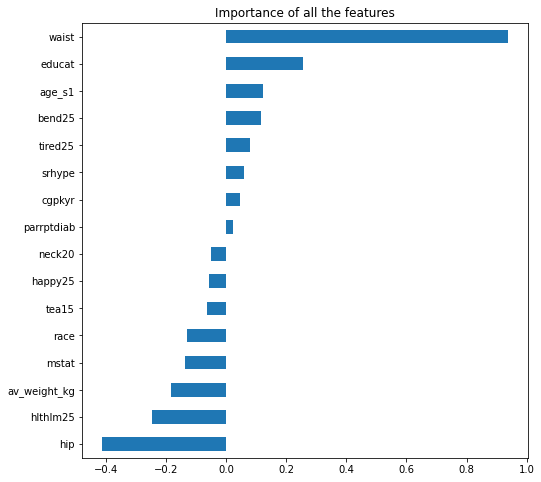

In [18]:
features = np.std(X_train,0)*logreg.coef_[0] #normalization 
coef_logreg = pd.Series(np.std(X_train,0)*logreg.coef_[0].flatten(),index = X_test.columns,name = 'Var') #use list, index to construct series 
print(features.sort_values(ascending=False)) # sort the variables from high coefficient to low coefficient
plt.figure(figsize=(8,8))
coef_logreg.sort_values().plot(kind='barh')
plt.title("Importance of all the features")

Part3  Evaluate the performance of your model, explain the performance and draw a meaningful conclusion

In [23]:
logreg_matric = metrics.confusion_matrix(Y_test,y_pred)
logreg_matric

array([[186, 208],
       [ 92, 487]], dtype=int64)

In [39]:
display(print(confusion_matrix(Y_test, y_pred))) # confusion matrix
display(print(classification_report(Y_test, y_pred))) #show  precision ,recall,  f1-score,  support
display(print("Accuracy:", metrics.accuracy_score(Y_test, y_pred))) #accuracy


[[186 208]
 [ 92 487]]


None

              precision    recall  f1-score   support

           0       0.67      0.47      0.55       394
           1       0.70      0.84      0.76       579

    accuracy                           0.69       973
   macro avg       0.68      0.66      0.66       973
weighted avg       0.69      0.69      0.68       973



None

Accuracy: 0.6916752312435765


None

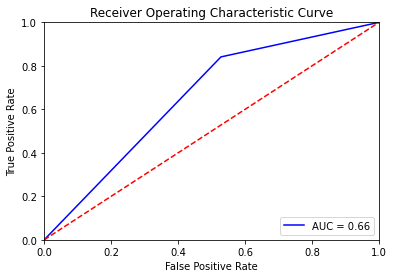

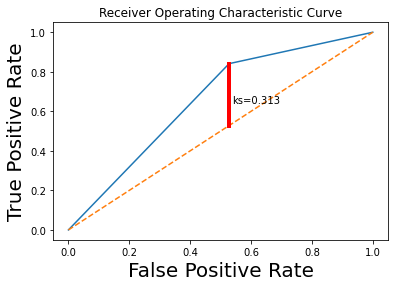

auc is 0.6565932861664168


None

In [33]:
fpr, tpr, threshold = roc_curve(Y_test, y_pred)

rocauc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % rocauc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.show()
        
ks_value = max(abs(fpr-tpr))
    #Graphing ROC curve
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle='--')
    #Graphing KS
x = np.argwhere(abs(fpr-tpr) == ks_value)[0, 0]
plt.plot([fpr[x], fpr[x]], [fpr[x], tpr[x]], linewidth=4, color='r')
plt.text(fpr[x]+0.01,tpr[x]-0.2, 'ks='+str(format(ks_value,'0.3f')),color= 'black')
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)
plt.title('Receiver Operating Characteristic Curve')
plt.show()

display(print("auc is", auc(false_positive_rate, true_positive_rate)))
   
